# Graph; Breath-First Search

## Graphs
* G = (V, E), where V is the set of vertices and E is the set of edges on those vertices
* **Acyclic**: if it contains no cycle
* **Degree**: 
    * **Undirected**: the degree of a vertex v is the number of edges incident on v
    * **Directed**: 
        * the in-degree of vertex v is the number of edges incident to v
        * the out-degree of vertex v is the number of edges incident from v
* **Adjacent**: A is pointed(adjacent) from C
* **Neighbourhood**: 
    * the set of vertices that share an edge with v
    * in-neighbourhood: the set of vertices u such that (u, v) is an edge, where you are going to
    * out-neighbourhood: the set of vertices u such that (v, u) is an edge, who is going to you
* **Incident**:
    * incident from: leaves from
    * incdient to: enters to
* **Path**: sequence of edges connected to each other
    * E.g. G1: a &rarr; b &rarr;d &rarr;d &rarr;d
* **Simple path**: no repeated edges or vertices
    * E.g. G2: a - c - d
* **Cycle path**: start vertex = end vertex
    * e.g. G1: a &rarr; c &rarr; b &rarr; a
* **Tree**:
    * undirected connected graph that is acyclic

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Directed Graph: G1
* a directed graph is a graph where the tuple order does matter, ($v_1, v_2$) and ($v_2, v_1$) represent different edges in a directed graph

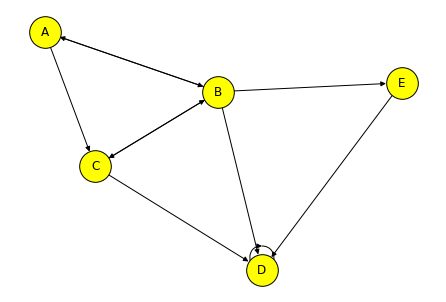

In [32]:
lst = [(1, 2), (1, 3), (2, 1), (2, 5), (2, 4), (2, 3), (3, 2), (3, 4), (4, 4), (5, 4)]
directed_G = nx.DiGraph()
directed_G.add_edges_from(lst)
label_dict = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: "E"}
nx.draw(directed_G, with_labels=True, node_color="#FFFF00", node_size=1000, edgecolors="#000000", labels=label_dict)

### Undirected Graph: G2
* where order does not matter in the edge tuples: ($v_1, v_2$) and ($v_2, v_1$) represent different edges in a directed graph

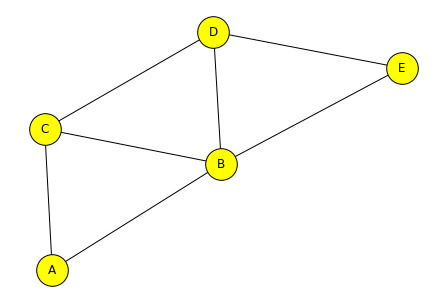

In [34]:
lst = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (2, 5), (5, 4)]
undirected_G = nx.Graph()
undirected_G.add_edges_from(lst)
label_dict = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: "E"}
nx.draw(undirected_G, with_labels=True, node_color="#FFFF00", node_size=1000, edgecolors="#000000", labels=label_dict)

## Adjacency Matrix
* |V| = n
* |E| = m
* time complexity to build: $\theta(n^2)$
* space complexity = $\theta(n^2)$
* edge queries: $\theta(1)$

|**G1**|a|b|c|d|e|
|-|-|-|-|-|-|
|a|0|1|1|0|0|
|b|1|0|1|1|1|
|c|0|1|0|1|0|
|d|0|0|0|1|0|
|e|0|0|0|1|0|

|**G2**|a|b|c|d|e|
|-|-|-|-|-|-|
|a|0|1|1|0|0|
|b|1|0|1|1|1|
|c|1|1|0|1|0|
|d|0|1|1|0|1|
|e|0|1|0|1|0|

## Adjacency Lists
* time complexity to build: $\theta(m)$
* space complexity: $\theta(n + m)$
* edge queries: $\theta(n)$ worst case
* neighbour query:

### G1
* a: b, c
* b: a, c, d, e
* c: b, d
* d: d
* e: d


### G2
* a: b, c
* b: a, c, d, e
* c: a, b, d
* d: b, c, e
* e: e, d

## Breath First Search (BFS)
* **Goal**: starting from source S in V, BFS visits every vertex v reachable from S
* **Intuition**: differenctiate nodes
    * Black: fully explored
    * Grey: discovered (visited)
    * White: undiscovered
* **Tracking information**:
    * for each $ v \in V$
        * color[v]: black, grey, white
        * $\pi$[v]: predecessor/ parent of V in BFS
        * d[v]: distance (# edges) from s to v using edges specified by $\pi$
    * use a queue to keep track of grey vertices. "breath-first": grey nodes first in, first out
* **Runtime**:
    * each vertex is enqueued at most once
    * each vertex is dequeued at most once
    * each adj. list is looped over at most once
    * w.c. constant time for each adj. list &rarr; $\theta(n+m)$ &rarr; input size
* **Invariant**:
    * Q contains only grey vertices
    * gray and black vertices never become white again
    * the queue has the following form:
    * the distances fileds of all grey vertices are correct
    * for all white vertices we have: (distance to s) > d[u]
* **Imples**:
    * every vertex is enqueued at most once &rarr; every vertex is dequeued at most once
    * processing a vertex u takes $\theta$(1 + |Adj[u]|) time &rarr; running time at most $\sum_{u} \theta$(1 + |Adj[u]|) = O(V + E)
* **Maintenance**:
    * when v is added to queue:
        * distance to s > d[u] (was white)
        * distance to s <= d[u] + 1 (adjacent to u) &rarr; distance to s = d[u] + 1
* **BFS: Properties**:
    * After BFS has been run from a source s on a graph G we have
        * each vertex u that is reachable from s has been visited
        * for each vertex u we have d[u] = distance to s
        * if d[u] < $\infty$, the there is a shortest path from s to u, that is a shortest path from s to $\pi$[u] followed by the edge ($\pi$[u], u)
 * **Proof**: follow from invariant

In [1]:
# NOTE: we use "d[v]" notation compared to "v.d" in textbook, except
# for input graph G, assumed to have attributes G.V and G.adj
# (adjacency lists)

def BFS(G, s):
    # Initialize tracking info for all vertices θ(n)
    for v in G.V:
        colour[v] = white #undiscovered
        π[v] = NULL # no predecessor
        d[v] = ∞ # distances from s to v 
        
    # Initialize empty queue and source vertex tracking info
    Q = make_queue() # initially empty
    colour[s] = grey
    π[s] = NULL # initially no predecessor
    d[s] = 0  # s has a distance of zero to itself
    Enqueue(Q, s)
    
    # Main loop. Loop Invariant: Q contains all (and only) grey vertices.
    while not IsEmpty(Q):
        u = dequeue(Q)
        for v in G.adj[u]: # in other words, for every edge (u, v) in E
            if colour[V] == white: # v was undiscovered
                colour[v] = grey # v is now discovered
                π[v] = u # v was reached from u, set predecessor as u
                d[v] = d[u] + 1 # set distances to other vertices
                Enqueue(Q, v) # v is not yet explored: add it to the queue
            colour[u] = black # u is now fully explored
    

### Minimum Distance
* Def: $\forall u, v \in V: \delta(u, v) =$ min distance from u to v
* Claim: At the end of BFS, d[v] = $\delta(s, v) (\forall v \in V)$ = min distance s to v

#### Lemma 1: $\forall (u, v) \in E, \delta(s, v)$(smallest s &rarr; v by def) $\leq \delta(s, u) + 1$ (only possible path)
#### Lemma 2: $\forall v \in V, d[V] \geq \delta(s, v)$
* BFS path just one possible. By def cannot have d[v] < $\delta(s, v)$
* Proof idea: induction on # of enqueue
#### Lemme 3: At any point during BFS
* Q = $[V_1, ..., V_r] \rightarrow d[V_1] \leq ... \leq d[V_r]$ and $d[V_r] \leq d[V_1] + 1$
* So either $d[V_1] = ... = d[V_r]$ or $d[V_1] = ... = d[V_i] = l, d[V_{i+1}] = ... = d[V_r] = l + 1$

### Minimum Distance Claim Proof
Proof by Contradiction:

Assume $ \exists v \in V, d[V] > \delta(s, v)$

Let $V_0$ satisfy $d[v_0] > \delta(s, v_0)$(\*) with smallest $\delta(s, v_0)$

&rarr; $\delta(s, u) < \delta(s, v_0)$(\*\*) &rarr;  $\delta(s, u) = d[u]$

Consider iteration when $u_0$ dequeued in BFS
* if $v_0$ is white, then $d[v_0] = d[u_0+1]$ (contradicts (\*\*\*))
* if $v_0$ is black, then $v_0$ dequeued before $u_0$ (contradicts (\*\*\*))
* if $v_0$ is grey, by lemma 3,  $d[v_0] \leq d[u_0]+1$ (contradicts (\*\*\*))

By Contradiction, $d[v_0] \ngeq \delta(s, v_0)$

## Quiz
Describe Graphs:
Question 6: Why is k not adjacent to L?